Time taken with 1 threads: 5.645262241363525 seconds
Time taken with 2 threads: 18.878023386001587 seconds
Time taken with 3 threads: 26.07363271713257 seconds
Time taken with 4 threads: 31.82763648033142 seconds
Time taken with 5 threads: 42.48706865310669 seconds
Time taken with 6 threads: 50.61696171760559 seconds
Time taken with 7 threads: 62.44346570968628 seconds
Time taken with 8 threads: 66.20452642440796 seconds


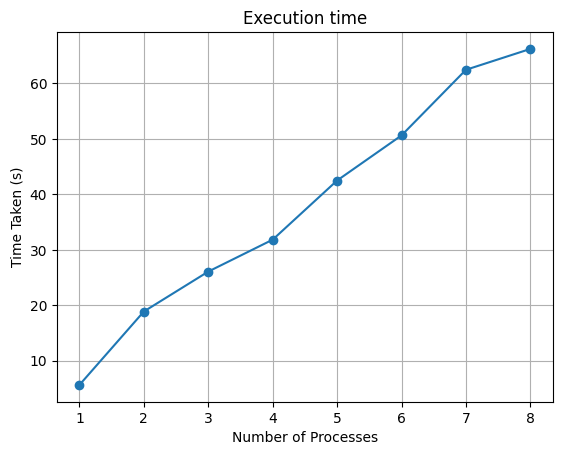

CPU usage: 50.1%


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import psutil
import multiprocessing as mp

def multiply_matrices(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

def generate_random_matrices(size):
    return np.random.randint(10, size=(size, size)), np.random.randint(10, size=(size, size))

def perform_multiplication(num_procs, matrix1, matrix2):
    pool = mp.Pool(processes=num_procs)
    results = []
    for _ in range(num_procs):
        results.append(pool.apply_async(multiply_matrices, (matrix1, matrix2)))
    pool.close()
    pool.join()
    return [result.get() for result in results]

def plot_performance(cores, times):
    plt.plot(cores, times, marker='o', linestyle='-')
    plt.xlabel('Number of Processes')
    plt.ylabel('Time Taken (s)')
    plt.title('Execution time')
    plt.grid(True)
    plt.show()

def main():
    matrix_size = 1000
    constant_matrix_size = 1000
    constant_matrix = np.random.randint(10, size=(constant_matrix_size, constant_matrix_size))

    cores = [1, 2, 3, 4, 5, 6, 7, 8]
    times_taken = []

    for num_cores in cores:
        matrix1, _ = generate_random_matrices(matrix_size)
        start_time = time.time()
        result = perform_multiplication(num_cores, matrix1, constant_matrix)
        end_time = time.time()
        total_time = end_time - start_time
        times_taken.append(total_time)
        print(f"Time taken with {num_cores} threads: {total_time} seconds")

    plot_performance(cores, times_taken)

    cpu_usage = psutil.cpu_percent()
    print(f"CPU usage: {cpu_usage}%")

if __name__ == "__main__":
    main()
